In [132]:
import pandas as pd

In [133]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [134]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.stats import gmean
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

In [135]:
import warnings
warnings.filterwarnings(action="ignore")

In [136]:
df= pd.read_csv("new_dataset.csv")

In [137]:
df.head()

,date,GDP,weekly_earnings,int_rate,unemp_rate,yield,deposits_rate
0,2007 Jan,84.0,421,5.1705,5.5,5.1419,2.99
1,2007 Feb,84.2,426,5.2500,5.5,5.1621,3.13
2,2007 Mar,84.5,417,5.2500,5.5,5.0758,3.10
3,2007 Apr,84.7,413,5.2500,5.4,5.2787,3.13
4,2007 May,84.8,416,5.4286,5.4,5.4112,3.14


In [138]:
df['date']=pd.to_datetime(df['date'])
df

,date,GDP,weekly_earnings,int_rate,unemp_rate,yield,deposits_rate
0,2007-01-01,84.0,421,5.1705,5.5,5.1419,2.99
1,2007-02-01,84.2,426,5.2500,5.5,5.1621,3.13
2,2007-03-01,84.5,417,5.2500,5.5,5.0758,3.10
3,2007-04-01,84.7,413,5.2500,5.4,5.2787,3.13
4,2007-05-01,84.8,416,5.4286,5.4,5.4112,3.14
5,2007-06-01,84.9,419,5.5000,5.3,5.6831,3.31
6,2007-07-01,85.2,420,5.7159,5.3,5.6415,3.33
7,2007-08-01,85.4,421,5.7500,5.3,5.3359,3.46
8,2007-09-01,85.5,423,5.7500,5.2,5.0886,3.47
9,2007-10-01,85.7,421,5.7500,5.2,5.0221,3.51


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             180 non-null    datetime64[ns]
 1   GDP              180 non-null    float64       
 2   weekly_earnings  180 non-null    int64         
 3   int_rate         180 non-null    float64       
 4   unemp_rate       180 non-null    float64       
 5   yield            180 non-null    float64       
 6   deposits_rate    180 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 10.0 KB


In [140]:
df.describe()

,GDP,weekly_earnings,int_rate,unemp_rate,yield,deposits_rate
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,90.229444,483.350000,1.080428,5.866111,1.661261,1.427556
std,6.256551,45.094745,1.616569,1.544794,1.448767,0.798034
min,74.900000,413.000000,0.100000,3.800000,-0.084500,0.370000
25%,84.875000,447.000000,0.500000,4.500000,0.657600,0.780000
50%,89.900000,471.000000,0.500000,5.400000,1.114900,1.050000
75%,96.200000,513.500000,0.610800,7.800000,2.339100,1.760000
max,100.400000,596.000000,5.750000,8.500000,5.683100,3.510000


<Axes: xlabel='date'>

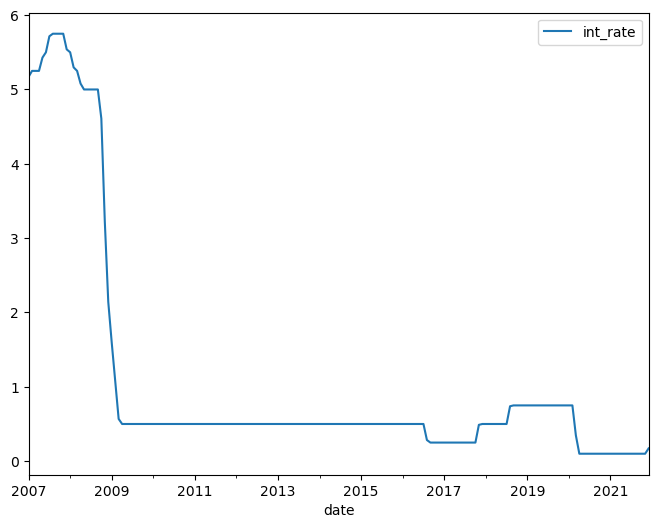

In [141]:
df.plot('date','int_rate')

In [142]:
df.corr()

,GDP,weekly_earnings,int_rate,unemp_rate,yield,deposits_rate
GDP,1.000000,0.806353,-0.317077,-0.781909,-0.592927,0.031407
weekly_earnings,0.806353,1.000000,-0.518464,-0.676720,-0.767460,-0.066344
int_rate,-0.317077,-0.518464,1.000000,-0.080544,0.866228,0.834629
unemp_rate,-0.781909,-0.676720,-0.080544,1.000000,0.263829,-0.429943
yield,-0.592927,-0.767460,0.866228,0.263829,1.000000,0.553707
deposits_rate,0.031407,-0.066344,0.834629,-0.429943,0.553707,1.000000


In [143]:
df['int_rate'].corr(df['GDP'])

-0.3170771117703931

In [144]:
df['int_rate'].corr(df['weekly_earnings'])

-0.5184641433193453

In [145]:
df['int_rate'].corr(df['unemp_rate'])

-0.08054369006333847

In [146]:
df['int_rate'].corr(df['yield'])

0.8662284751818055

In [147]:
df['int_rate'].corr(df['deposits_rate'])

0.8346294497527523

In [148]:
corr=df.corr()

In [149]:
corr['int_rate'].sort_values(ascending=False)

int_rate           1.000000
yield              0.866228
deposits_rate      0.834629
unemp_rate        -0.080544
GDP               -0.317077
weekly_earnings   -0.518464
Name: int_rate, dtype: float64

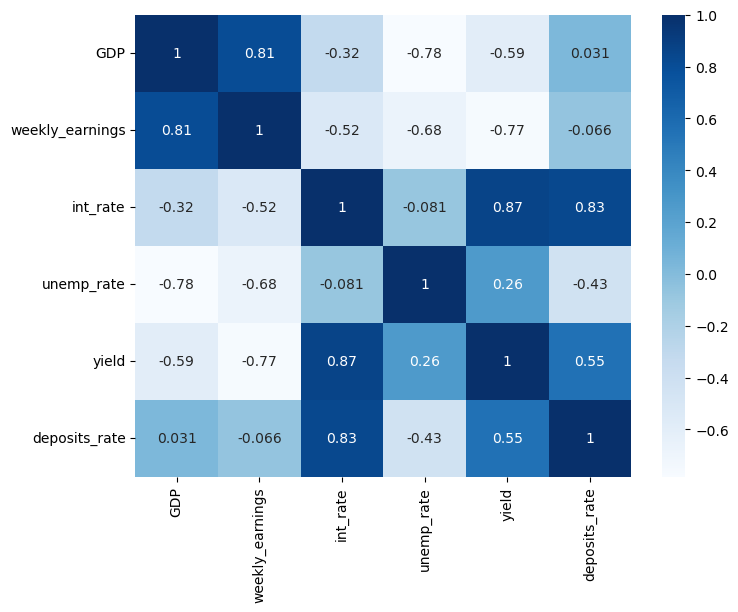

In [150]:
plt.figure(figsize=(8,6))
dataplot = sns.heatmap(corr, cmap="Blues", annot=True)
plt.show()

In [151]:
col_names = ['GDP', 'unemp_rate', 'weekly_earnings', 'int_rate', 'yield','deposits_rate']
X = df[col_names]

In [152]:
fd = df.drop("date",1)

In [153]:
fd_1=fd.drop("int_rate",1)

In [154]:
fd

,GDP,weekly_earnings,int_rate,unemp_rate,yield,deposits_rate
0,84.0,421,5.1705,5.5,5.1419,2.99
1,84.2,426,5.2500,5.5,5.1621,3.13
2,84.5,417,5.2500,5.5,5.0758,3.10
3,84.7,413,5.2500,5.4,5.2787,3.13
4,84.8,416,5.4286,5.4,5.4112,3.14
5,84.9,419,5.5000,5.3,5.6831,3.31
6,85.2,420,5.7159,5.3,5.6415,3.33
7,85.4,421,5.7500,5.3,5.3359,3.46
8,85.5,423,5.7500,5.2,5.0886,3.47
9,85.7,421,5.7500,5.2,5.0221,3.51


In [155]:
scaler = StandardScaler().fit(X.values)
X = scaler.transform(X.values)
X = pd.DataFrame(X, columns = col_names)
X

,GDP,unemp_rate,weekly_earnings,int_rate,yield,deposits_rate
0,-0.998445,-0.237658,-1.386501,2.537151,2.409185,1.963327
1,-0.966389,-0.237658,-1.275314,2.586467,2.423167,2.139248
2,-0.918306,-0.237658,-1.475451,2.586467,2.363433,2.101551
3,-0.886250,-0.302572,-1.564400,2.586467,2.503874,2.139248
4,-0.870222,-0.302572,-1.497688,2.697256,2.595586,2.151814
5,-0.854194,-0.367486,-1.430976,2.741547,2.783786,2.365431
6,-0.806111,-0.367486,-1.408739,2.875474,2.754992,2.390563
7,-0.774055,-0.367486,-1.386501,2.896627,2.543466,2.553917
8,-0.758027,-0.432400,-1.342026,2.896627,2.372293,2.566483
9,-0.725972,-0.432400,-1.386501,2.896627,2.326264,2.616746


In [156]:
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

plt.rcParams["figure.figsize"] = (10,6)

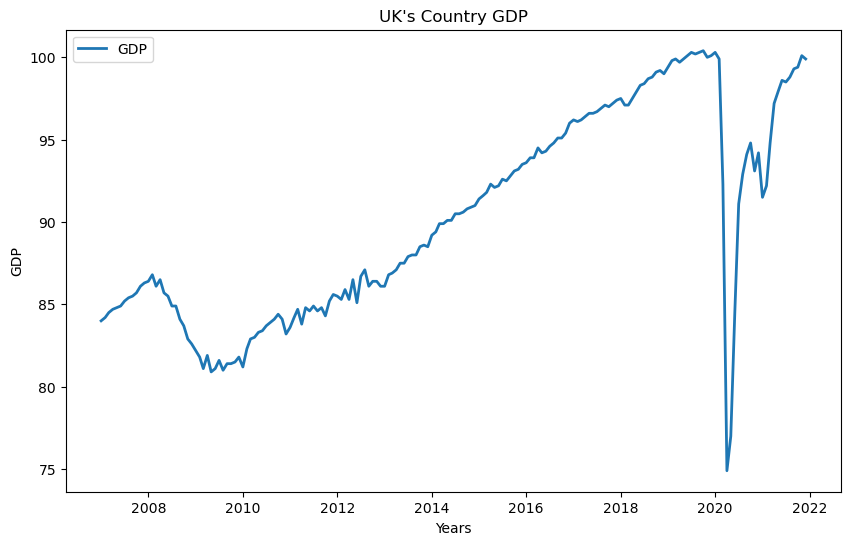

In [157]:
plt.plot(df['date'], df['GDP'], label='GDP',linewidth=2)
plt.xlabel('Years')
plt.ylabel('GDP')
plt.title("UK's Country GDP")
plt.legend()
plt.show()

In [158]:
df_norm = X / X.max(axis=0)
df_norm

,GDP,unemp_rate,weekly_earnings,int_rate,yield,deposits_rate
0,-0.612498,-0.139000,-0.553484,0.875899,0.865435,0.750293
1,-0.592833,-0.139000,-0.509099,0.892924,0.870457,0.817522
2,-0.563336,-0.139000,-0.588992,0.892924,0.848999,0.803116
3,-0.543672,-0.176967,-0.624501,0.892924,0.899449,0.817522
4,-0.533840,-0.176967,-0.597870,0.931171,0.932394,0.822324
5,-0.524007,-0.214934,-0.571238,0.946462,1.000000,0.903959
6,-0.494510,-0.214934,-0.562361,0.992697,0.989656,0.913563
7,-0.474846,-0.214934,-0.553484,1.000000,0.913671,0.975990
8,-0.465013,-0.252900,-0.535730,1.000000,0.852182,0.980792
9,-0.445349,-0.252900,-0.553484,1.000000,0.835647,1.000000


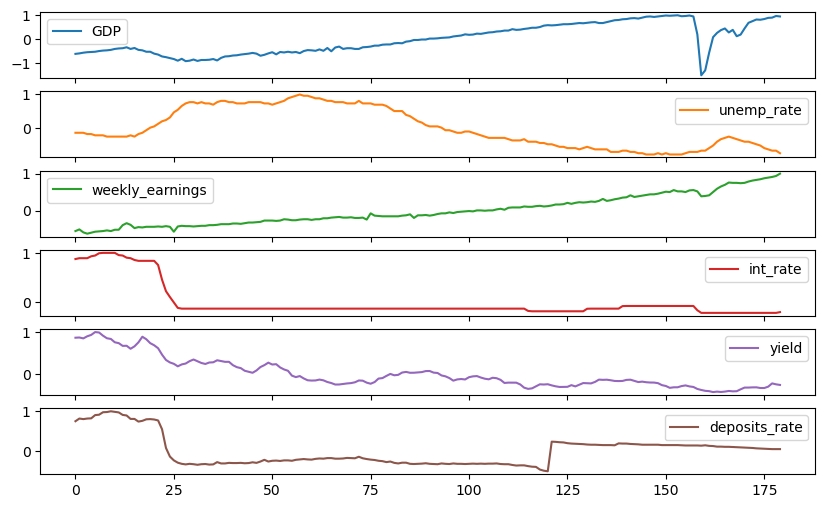

In [159]:
df_norm.plot.line(subplots=True)
features = ['GDP', 'unemp_rate', 'weekly_earnings', 'yield', 'int_rate', 'deposits_rate']
x = df_norm.loc[:, features].values 

In [160]:
x

array([[-0.61249795, -0.13900021, -0.55348424,  0.86543471,  0.8758987 ,
         0.75029346],
       [-0.59283334, -0.13900021, -0.50909898,  0.87045729,  0.89292381,
         0.81752214],
       [-0.56333643, -0.13900021, -0.58899245,  0.84899944,  0.89292381,
         0.803116  ],
       ...,
       [ 0.90167695, -0.67053364,  0.91122947, -0.226404  , -0.20996094,
         0.04919432],
       [ 0.97050309, -0.67053364,  0.93786063, -0.24890615, -0.20996094,
         0.04919432],
       [ 0.95083848, -0.74646699,  1.        , -0.26335227, -0.19467046,
         0.04919432]])

In [161]:
y_cred = df_norm.loc[:,['int_rate']].values

In [162]:
y_cred

array([[ 0.8758987 ],
       [ 0.89292381],
       [ 0.89292381],
       [ 0.89292381],
       [ 0.93117143],
       [ 0.94646191],
       [ 0.9926974 ],
       [ 1.        ],
       [ 1.        ],
       [ 1.        ],
       [ 1.        ],
       [ 0.95492092],
       [ 0.94646191],
       [ 0.90311746],
       [ 0.89292381],
       [ 0.85641083],
       [ 0.83938572],
       [ 0.83938572],
       [ 0.83938572],
       [ 0.83938572],
       [ 0.83938572],
       [ 0.75558789],
       [ 0.45926524],
       [ 0.22753095],
       [ 0.1102397 ],
       [-0.00116237],
       [-0.1096948 ],
       [-0.12429999],
       [-0.12429999],
       [-0.12429999],
       [-0.12429999],
       [-0.12429999],
       [-0.12429999],
       [-0.12429999],
       [-0.12429999],
       [-0.12429999],
       [-0.12429999],
       [-0.12429999],
       [-0.12429999],
       [-0.12429999],
       [-0.12429999],
       [-0.12429999],
       [-0.12429999],
       [-0.12429999],
       [-0.12429999],
       [-0

In [163]:
pd.DataFrame(data = x, columns = features).head()

,GDP,unemp_rate,weekly_earnings,yield,int_rate,deposits_rate
0,-0.612498,-0.139000,-0.553484,0.865435,0.875899,0.750293
1,-0.592833,-0.139000,-0.509099,0.870457,0.892924,0.817522
2,-0.563336,-0.139000,-0.588992,0.848999,0.892924,0.803116
3,-0.543672,-0.176967,-0.624501,0.899449,0.892924,0.817522
4,-0.533840,-0.176967,-0.597870,0.932394,0.931171,0.822324


In [164]:
x.shape

(180, 6)

In [165]:
from sklearn.decomposition import PCA
pca= PCA()
principalComponents = PCA().fit(x)

In [166]:
np.round((principalComponents.explained_variance_ratio_*100),1)

array([63.2, 28.8,  4.1,  2.7,  0.9,  0.3])

In [167]:
pca = PCA(n_components=3)
pca.fit(x)
columns = ['Pca_%i' % i for i in range(3)]
df_pca = pd.DataFrame(pca.transform(x), columns=columns, index=pd.DataFrame(x).index)
df_pca.head()

,Pca_0,Pca_1,Pca_2
0,-0.852558,1.429804,-0.018032
1,-0.823107,1.473571,0.002558
2,-0.830565,1.467022,-0.056084
3,-0.822580,1.517097,-0.088854
4,-0.818633,1.549624,-0.096452


In [168]:
df_pca.shape

(180, 3)

In [169]:
pca.explained_variance_ratio_

array([0.63155951, 0.28781841, 0.04080985])

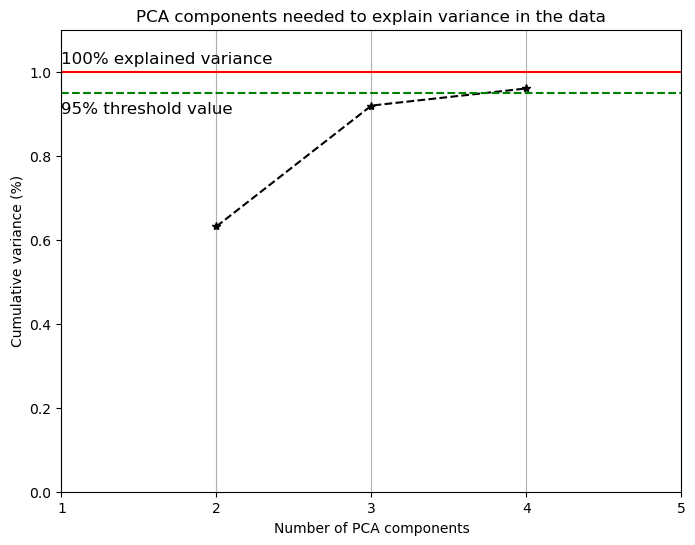

In [170]:
# Visualize the PCA & it's explained variance.
plt.rcParams['figure.figsize'] = (8,6)
fig, ax = plt.subplots()
xi = np.arange(2, 5, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi,yi,marker='*',linestyle='--',color='black')

plt.xlabel('Number of PCA components')
plt.xticks(np.arange(1,6, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('PCA components needed to explain variance in the data')

plt.axhline(y=0.95, color='green',linestyle='--')
plt.text(1, 0.9, '95% threshold value',fontsize=12)
plt.axhline(y=1,color='red',linestyle='-')
plt.text(1, 1.02, '100% explained variance',fontsize=12)

ax.grid(axis='x')
plt.show()

In [171]:
df[['int_rate']].head()

,int_rate
0,5.1705
1,5.2500
2,5.2500
3,5.2500
4,5.4286


In [172]:
finalDf = pd.concat([df_pca, df['int_rate']], axis = 1)
finalDf

,Pca_0,Pca_1,Pca_2,int_rate
0,-0.852558,1.429804,-0.018032,5.1705
1,-0.823107,1.473571,0.002558,5.2500
2,-0.830565,1.467022,-0.056084,5.2500
3,-0.822580,1.517097,-0.088854,5.2500
4,-0.818633,1.549624,-0.096452,5.4286
5,-0.796406,1.645922,-0.082060,5.5000
6,-0.776379,1.669377,-0.099949,5.7159
7,-0.739280,1.676487,-0.073379,5.7500
8,-0.688182,1.666226,-0.041503,5.7500
9,-0.677448,1.672737,-0.055050,5.7500


In [173]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
finalDf

,Pca_0,Pca_1,Pca_2,int_rate
0,-0.852558,1.429804,-0.018032,5.1705
1,-0.823107,1.473571,0.002558,5.2500
2,-0.830565,1.467022,-0.056084,5.2500
3,-0.822580,1.517097,-0.088854,5.2500
4,-0.818633,1.549624,-0.096452,5.4286
5,-0.796406,1.645922,-0.082060,5.5000
6,-0.776379,1.669377,-0.099949,5.7159
7,-0.739280,1.676487,-0.073379,5.7500
8,-0.688182,1.666226,-0.041503,5.7500
9,-0.677448,1.672737,-0.055050,5.7500


<Axes: >

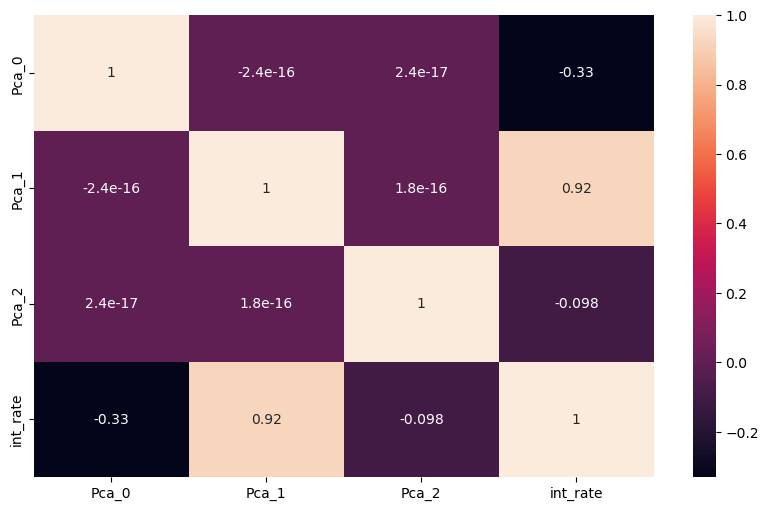

In [174]:
plt.figure(figsize=(10,6))
sns.heatmap(finalDf.corr(), annot=True)

In [175]:
Pca_0 = finalDf['Pca_0']
Pca_1 = finalDf['Pca_1']
Pca_2 = finalDf['Pca_2']

Text(0, 0.5, 'cumulative explained variance')

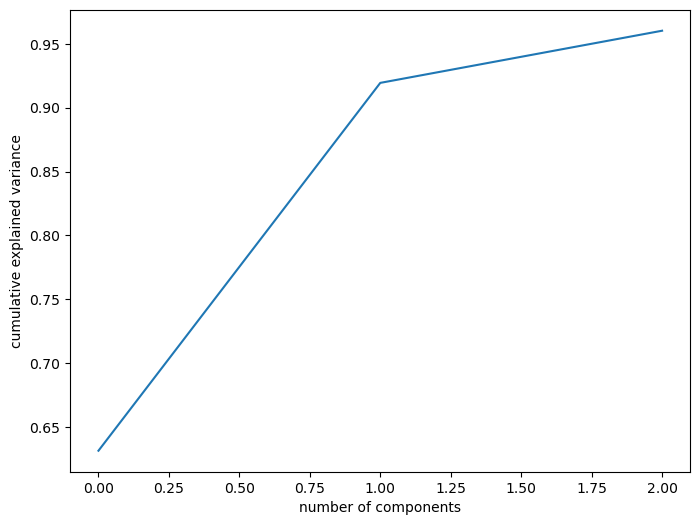

In [176]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

Text(0, 0.5, 'Pca1')

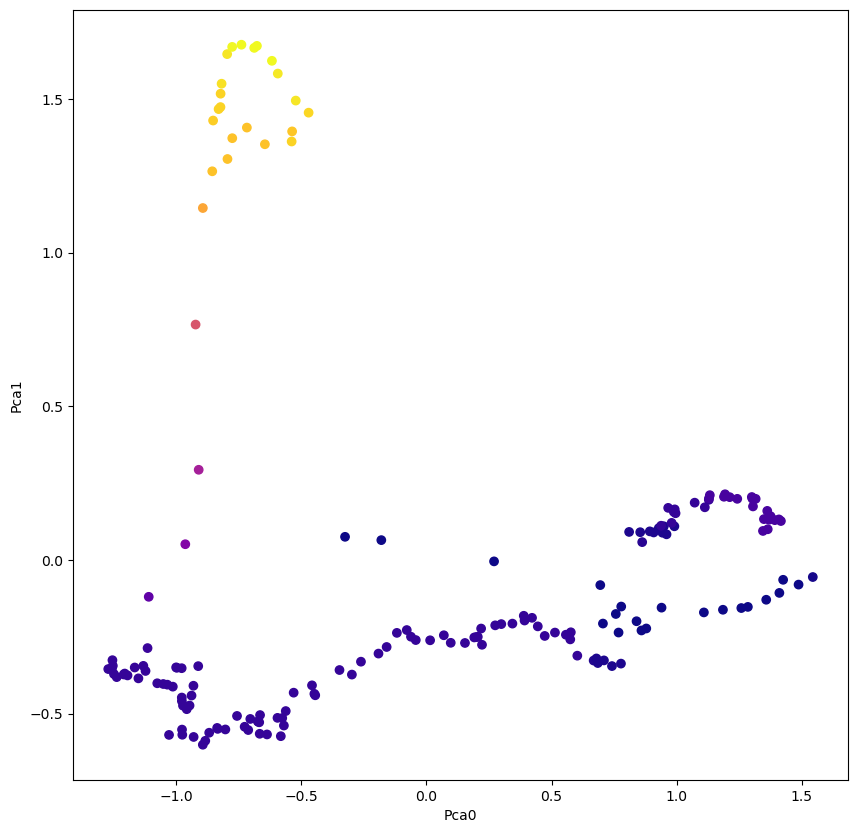

In [177]:
plt.figure(figsize=(10,10))
plt.scatter(Pca_0, Pca_1, c=df['int_rate'],cmap='plasma')
plt.xlabel('Pca0')
plt.ylabel('Pca1')

Text(0, 0.5, 'Pca2')

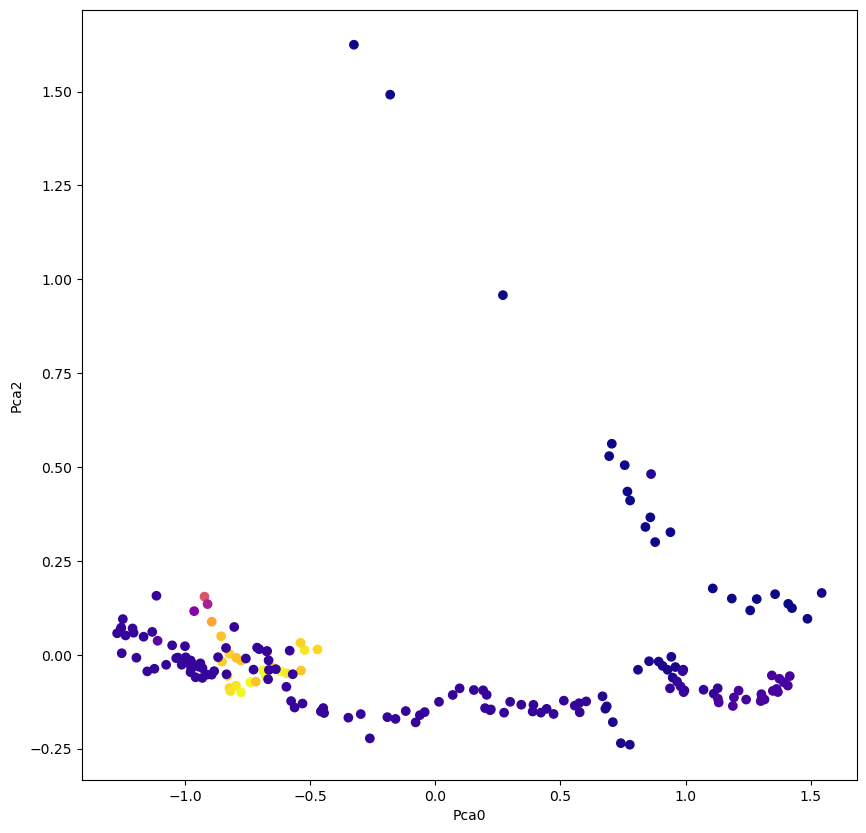

In [178]:
plt.figure(figsize=(10,10))
plt.scatter(Pca_0, Pca_2,c=df['int_rate'],cmap='plasma')
plt.xlabel('Pca0')
plt.ylabel('Pca2')


Text(0, 0.5, 'Pca2')

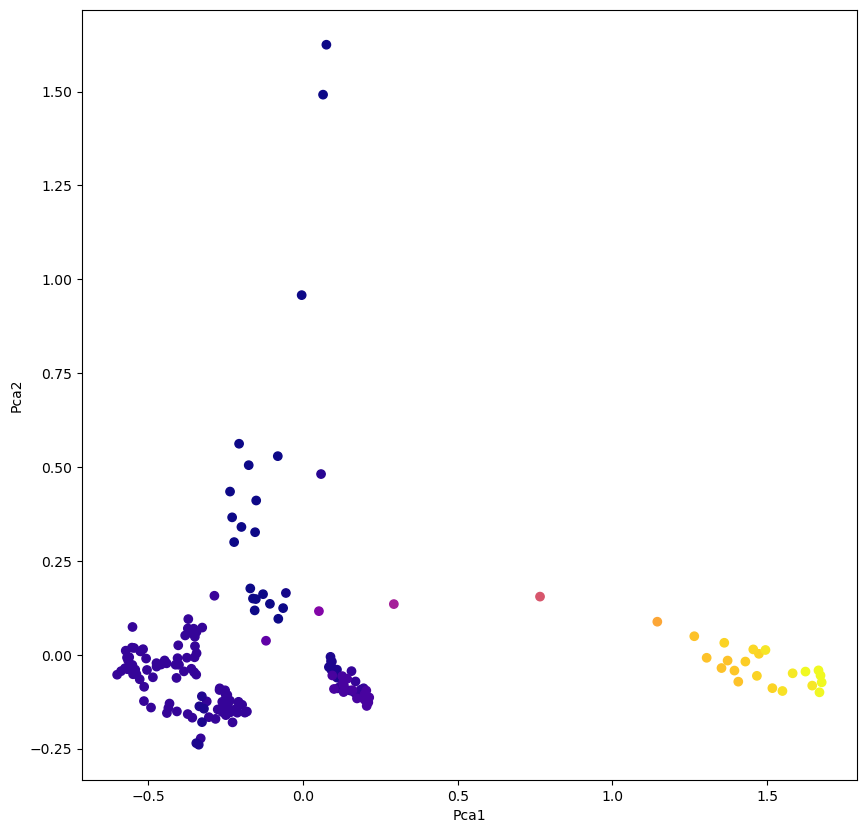

In [179]:
plt.figure(figsize=(10,10))
plt.scatter(Pca_1, Pca_2,c=df['int_rate'],cmap='plasma')
plt.xlabel('Pca1')
plt.ylabel('Pca2')

In [180]:
df_cov = finalDf.cov()
df_cov.head()

,Pca_0,Pca_1,Pca_2,int_rate
Pca_0,8.078476e-01,-2.511957e-17,0.000000e+00,-0.480880
Pca_1,-2.511957e-17,3.681575e-01,2.511957e-17,0.905326
Pca_2,0.000000e+00,2.511957e-17,5.220116e-02,-0.036314
int_rate,-4.808800e-01,9.053256e-01,-3.631422e-02,2.613296


In [181]:
# Alternatively, you can use np.cov to directly compute the covariance matrix
cov_mat = np.cov(finalDf.T)

# Compute the eigenvectors and eigenvalues
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Covariance Matrix:\n', df_cov)
print('\nEigenvectors:\n', eig_vecs)
print('\nEigenvalues:\n', eig_vals)


Covariance Matrix:
                  Pca_0         Pca_1         Pca_2  int_rate
Pca_0     8.078476e-01 -2.511957e-17  0.000000e+00 -0.480880
Pca_1    -2.511957e-17  3.681575e-01  2.511957e-17  0.905326
Pca_2     0.000000e+00  2.511957e-17  5.220116e-02 -0.036314
int_rate -4.808800e-01  9.053256e-01 -3.631422e-02  2.613296

Eigenvectors:
 [[ 0.2009875  -0.95556685  0.20725846  0.05949745]
 [-0.31579806 -0.27152892 -0.86823423 -0.26965338]
 [ 0.01132151  0.00596126  0.29111618 -0.95660214]
 [-0.92722566 -0.11457965  0.3441869   0.09305618]]

Eigenvalues:
 [3.02631549 0.75018642 0.00926683 0.05573373]


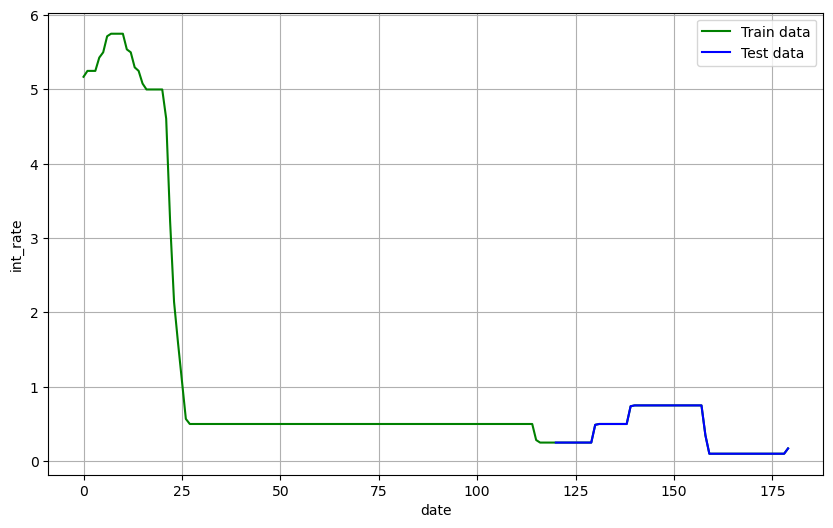

In [182]:
# Splitting the data into training and test sets
train_data, test_data = df.int_rate[3:int(len(df.int_rate)*0.67)], df.int_rate[int(len(df.int_rate)*0.67):]

# Plotting the time series data
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('date')
plt.ylabel('int_rate')

# Plotting the training data in green
plt.plot(df.int_rate, 'green', label='Train data')

# Plotting the test data in blue
plt.plot(test_data, 'blue', label='Test data')

# Adding a legend to the plot
plt.legend()

# Displaying the plot
plt.show()



In [183]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Features (X) and target variable (y)
X = finalDf.drop(['int_rate'], axis=1)
y = finalDf['int_rate']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.67, random_state=0)

# Creating a Linear Regression model
scaling = LinearRegression()

# Fitting the model on the training data
scaling.fit(X_train, y_train)

# Getting the intercept and coefficients
intercept = scaling.intercept_
print('Intercept:', intercept)

coefficients = scaling.coef_
print('Coefficients:', coefficients)

# Calculating the R-squared score on the test set
r2 = scaling.score(X_test, y_test)
print('R-squared:', r2 * 100)

# Predicting interest rates on the test set
ypred = scaling.predict(X_test)


Intercept: 1.0564749470607608
Coefficients: [-0.53960024  2.43236252 -0.77941141]
R-squared: 97.23707213876452


In [184]:
ypred

array([ 0.52229265,  5.59040823,  0.76704386,  0.14787493,  1.00374821,
        0.16600295,  0.22683952,  0.67713662,  0.07009184,  0.40267641,
        0.74803437,  0.68100046,  0.35703006,  5.55365403,  4.82525325,
        0.5642264 , -0.14716425,  0.9735701 ,  0.79292707,  0.51048971,
        0.96278092,  0.13564694,  0.16391017,  5.34263238,  0.82833011,
       -0.1940743 ,  0.21786712, -0.27135912, -0.26573942,  0.16221597,
        0.44555998,  0.83754856,  0.49057563,  0.88647384,  0.05140308,
        5.51303178,  0.26177722,  0.42816528,  0.4392993 , -0.05284035,
        0.81511416,  1.61015975,  0.89154745,  0.41767633,  0.43869958,
        0.39332616,  4.66507391,  0.9534208 ,  0.47060175,  0.92281145,
        4.72237448,  0.74619351, -0.08267097,  0.87208533,  0.68148534,
        0.18274848,  3.29645228,  0.2996349 ,  0.29185093,  0.85819239,
        0.38922362,  0.68412361, -0.02228947,  0.78094435,  0.50605943,
        0.60303866,  0.89070661, -0.07135394,  0.6596075 ,  0.20

In [185]:
y_test

106    0.5000
7      5.7500
125    0.2500
160    0.1000
136    0.5000
71     0.5000
56     0.5000
151    0.7500
162    0.1000
108    0.5000
33     0.5000
153    0.7500
158    0.3477
5      5.5000
18     5.0000
92     0.5000
164    0.1000
143    0.7500
37     0.5000
101    0.5000
144    0.7500
60     0.5000
63     0.5000
4      5.4286
122    0.2500
165    0.1000
113    0.5000
166    0.1000
168    0.1000
61     0.5000
44     0.5000
26     0.5682
107    0.5000
131    0.5000
66     0.5000
8      5.7500
55     0.5000
83     0.5000
45     0.5000
163    0.1000
123    0.2500
24     1.5952
30     0.5000
95     0.5000
54     0.5000
80     0.5000
19     5.0000
137    0.5000
104    0.5000
146    0.7500
16     5.0000
51     0.5000
170    0.1000
121    0.2500
40     0.5000
74     0.5000
22     3.2250
110    0.5000
111    0.5000
129    0.2500
96     0.5000
90     0.5000
116    0.2500
27     0.5000
94     0.5000
157    0.7500
130    0.4886
176    0.1000
89     0.5000
62     0.5000
2      5.2500
59    

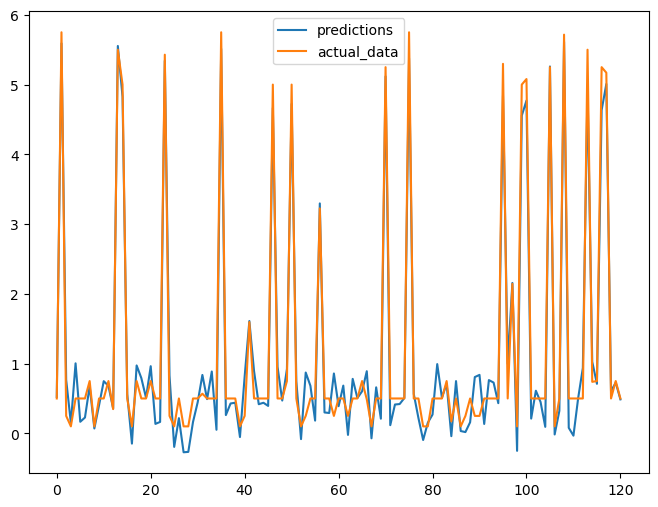

In [186]:
x = np.arange(121)  # Generating an array from 0 to 120
y1 = ypred          # Predicted values
y2 = y_test         # Actual values

# Plotting the predicted and actual values
plt.plot(x, y1, label='predictions')  # Line for predicted values
plt.plot(x, y2, label='actual_data')  # Line for actual values

plt.legend()  # Displaying the legend
plt.show()    # Showing the plot


In [187]:
from sklearn import metrics

# Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(y_test, ypred)
print('Mean Absolute Error:', mae)

# Mean Squared Error (MSE)
mse = metrics.mean_squared_error(y_test, ypred)
print('Mean Squared Error:', mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# R-squared (R2) or Coefficient of Determination
r2 = metrics.r2_score(y_test, ypred)
print('R-squared (Accuracy):', r2)



Mean Absolute Error: 0.23036634776824746
Mean Squared Error: 0.08178320736813657
Root Mean Squared Error: 0.2859776343844682
R-squared (Accuracy): 0.9723707213876452


In [188]:
# Import necessary libraries
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics


# Assume you have features (X) and target variable (y)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create AdaBoostRegressor object
abr = AdaBoostRegressor(n_estimators=50, learning_rate=1)

# Train AdaBoostRegressor
abr.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = abr.predict(X_test)


# Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

# Mean Squared Error (MSE)
mse = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# R-squared (R2) or Coefficient of Determination
r2 = metrics.r2_score(y_test, y_pred)
print('R-squared (Accuracy):', r2)

Mean Absolute Error: 0.13792626619476264
Mean Squared Error: 0.05971545744570644
Root Mean Squared Error: 0.24436746396708878
R-squared (Accuracy): 0.9775959085776627


In [189]:

import statsmodels.api as sm
X=df.drop(["int_rate", "date"], 1)
y=df['int_rate']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               int_rate   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     597.2
Date:                Wed, 24 Jan 2024   Prob (F-statistic):          1.64e-107
Time:                        16:54:55   Log-Likelihood:                -80.432
No. Observations:                 180   AIC:                             172.9
Df Residuals:                     174   BIC:                             192.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.0077      1.310     

In [190]:
import statsmodels.api as sm

X = df[["deposits_rate", "GDP"]]
y = df['int_rate']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:               int_rate   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     388.8
Date:                Wed, 24 Jan 2024   Prob (F-statistic):           1.71e-65
Time:                        16:54:55   Log-Likelihood:                -189.71
No. Observations:                 180   AIC:                             385.4
Df Residuals:                     177   BIC:                             395.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.6469      0.760      8.750

In [191]:
import statsmodels.api as sm

X = df[["yield", "weekly_earnings"]]
y = df['int_rate']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               int_rate   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     359.5
Date:                Wed, 24 Jan 2024   Prob (F-statistic):           4.65e-63
Time:                        16:54:55   Log-Likelihood:                -195.40
No. Observations:                 180   AIC:                             396.8
Df Residuals:                     177   BIC:                             406.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -7.2009      0.981     

In [192]:
import statsmodels.api as sm

X = df[["unemp_rate", "GDP"]]
y = df['int_rate']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               int_rate   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     53.82
Date:                Wed, 24 Jan 2024   Prob (F-statistic):           5.50e-19
Time:                        16:54:55   Log-Likelihood:                -298.61
No. Observations:                 180   AIC:                             603.2
Df Residuals:                     177   BIC:                             612.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.0687      2.699     10.769      0.0

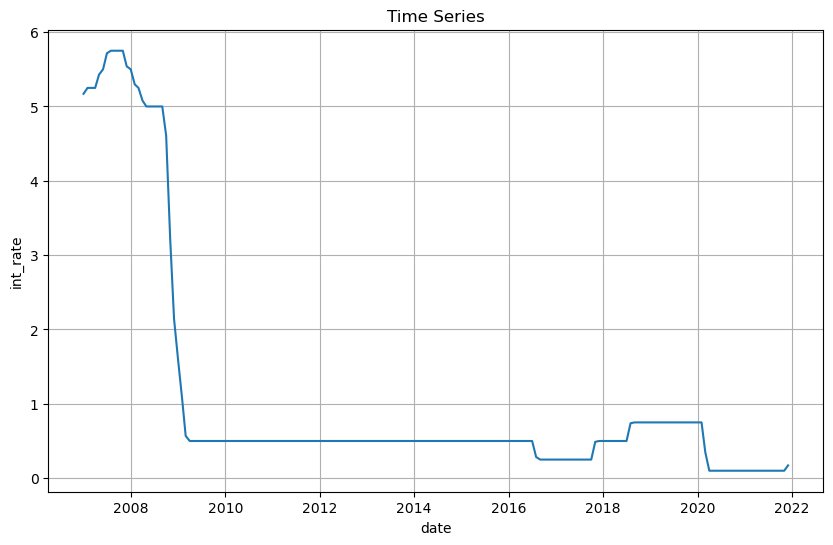

In [193]:
#Time series analysis
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('date')
plt.ylabel('int_rate')
plt.plot(df['date'], df['int_rate'])
plt.title('Time Series')
plt.show()

In [194]:
pip install arch

Note: you may need to restart the kernel to use updated packages.


In [195]:
!pip install --upgrade numba

  Using cached numba-0.58.1-cp310-cp310-win_amd64.whl (2.6 MB)
  Using cached llvmlite-0.41.1-cp310-cp310-win_amd64.whl (28.1 MB)
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.39.1


ERROR: Cannot uninstall 'llvmlite'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [196]:
pip install numba

Note: you may need to restart the kernel to use updated packages.


In [197]:
pip install arch_model

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement arch_model (from versions: none)
ERROR: No matching distribution found for arch_model


In [198]:
import arch
import pandas as pd
from arch import arch_model

#ARCH model
model_arch_1_1 = arch_model(df['int_rate'][1:], mean="constant", vol="ARCH", p=1)
results_arch_1_1 = model_arch_1_1.fit(update_freq=5)
results_arch_1_1.summary()


Iteration:      5,   Func. Count:     29,   Neg. LLF: 31983461.02522321
Iteration:     10,   Func. Count:     65,   Neg. LLF: -108.04573328672082
Iteration:     15,   Func. Count:     88,   Neg. LLF: -112.574715243126
Optimization terminated successfully    (Exit mode 0)
            Current function value: -112.58036904440563
            Iterations: 19
            Function evaluations: 99
            Gradient evaluations: 18


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:               int_rate   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                112.580
Distribution:                  Normal   AIC:                          -219.161
Method:            Maximum Likelihood   BIC:                          -209.599
                                        No. Observations:                  179
Date:                Wed, Jan 24 2024   Df Residuals:                      178
Time:                        16:55:13   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.5001  3.360e-03    148.869      0.000 [  0.494,  0.507]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      1.0690e-03  7.527e-04      1.420      0.156 [-4.063e-04,2.544e-03]
alpha[1]       0.9894  7.291e-02     13.569  6.083e-42      [  0.846,  1.132]
=============================================================================

Covariance estimator: robust
"""

In [199]:
#GARCH model
model_garch_1_1 = arch_model(df.int_rate[1:], mean = "constant", vol = "GARCH", p = 1, q = 1)
results_garch_1_1 = model_garch_1_1.fit(update_freq = 5)
results_garch_1_1.summary()

Iteration:      5,   Func. Count:     34,   Neg. LLF: -3.658631804760674
Iteration:     10,   Func. Count:     68,   Neg. LLF: 8134.1527177102935
Iteration:     15,   Func. Count:    104,   Neg. LLF: 1119.142662270198
Iteration:     20,   Func. Count:    143,   Neg. LLF: 210298.7484096987
Iteration:     25,   Func. Count:    170,   Neg. LLF: -112.58036849299538
Optimization terminated successfully    (Exit mode 0)
            Current function value: -112.58036858394777
            Iterations: 30
            Function evaluations: 180
            Gradient evaluations: 26


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:               int_rate   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                112.580
Distribution:                  Normal   AIC:                          -217.161
Method:            Maximum Likelihood   BIC:                          -204.411
                                        No. Observations:                  179
Date:                Wed, Jan 24 2024   Df Residuals:                      178
Time:                        16:55:13   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.5001  3.363e-03    148.709      0.000 [  0.494,  0.507]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      1.0690e-03  7.562e-04      1.414      0.157 [-4.131e-04,2.551e-03]
alpha[1]       0.9895  8.268e-02     11.968  5.258e-33      [  0.827,  1.152]
beta[1]    8.5714e-17  1.778e-02  4.822e-15      1.000 [-3.484e-02,3.484e-02]
=============================================================================

Covariance estimator: robust
"""

In [200]:
pip install --upgrade numpy

  Using cached numpy-1.26.3-cp310-cp310-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Saiteja Reddy\\anaconda3\\Lib\\site-packages\\~=mpy\\.libs\\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [201]:
import numpy as np

In [202]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [203]:
import pmdarima as pm

In [204]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(int_rate):
    result = adfuller(int_rate)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations']
    
    for value, label in zip(result, labels):
        print(label + ' : ' + str(value))

    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis (Ho), reject the null hypothesis. Data is stationary.")
    else:
        print("Weak evidence against the null hypothesis, indicating it is non-stationary.")


adfuller_test(df['int_rate'])


ADF Test Statistic : -3.956493248908403
p-value : 0.0016562656105347468
#Lags Used : 6
Number of Observations : 173
Strong evidence against the null hypothesis (Ho), reject the null hypothesis. Data is stationary.


In [205]:
# importing auto correlation function
from statsmodels.graphics.tsaplots import plot_acf
# importing partial auto correlation function
from statsmodels.graphics.tsaplots import plot_pacf

In [206]:
finalDf = pd.concat([finalDf, df[['date']]], axis = 1)
finalDf

,Pca_0,Pca_1,Pca_2,int_rate,date
0,-0.852558,1.429804,-0.018032,5.1705,2007-01-01
1,-0.823107,1.473571,0.002558,5.2500,2007-02-01
2,-0.830565,1.467022,-0.056084,5.2500,2007-03-01
3,-0.822580,1.517097,-0.088854,5.2500,2007-04-01
4,-0.818633,1.549624,-0.096452,5.4286,2007-05-01
5,-0.796406,1.645922,-0.082060,5.5000,2007-06-01
6,-0.776379,1.669377,-0.099949,5.7159,2007-07-01
7,-0.739280,1.676487,-0.073379,5.7500,2007-08-01
8,-0.688182,1.666226,-0.041503,5.7500,2007-09-01
9,-0.677448,1.672737,-0.055050,5.7500,2007-10-01


In [207]:
fd2=finalDf.drop("Pca_0", axis=1)
fd2_1=fd2.drop("Pca_1", axis=1)
fd2_2=fd2_1.drop("Pca_2", axis=1)
fd2_2

,int_rate,date
0,5.1705,2007-01-01
1,5.2500,2007-02-01
2,5.2500,2007-03-01
3,5.2500,2007-04-01
4,5.4286,2007-05-01
5,5.5000,2007-06-01
6,5.7159,2007-07-01
7,5.7500,2007-08-01
8,5.7500,2007-09-01
9,5.7500,2007-10-01


In [208]:
fd2_2['int_rate First Difference'] = fd2_2['int_rate'] - fd2_2['int_rate'].shift(1)

In [209]:
fd2_2['Seasonal First Difference']=fd2_2['int_rate']-fd2_2['int_rate'].shift(3)

In [210]:
adfuller_test(fd2_2['Seasonal First Difference'].dropna())

ADF Test Statistic : -3.138482523097334
p-value : 0.02383330935447332
#Lags Used : 9
Number of Observations : 167
Strong evidence against the null hypothesis (Ho), reject the null hypothesis. Data is stationary.


In [211]:
adfuller_test(fd2_2['int_rate'].diff().diff().dropna())

ADF Test Statistic : -5.554323221213067
p-value : 1.5935948074805531e-06
#Lags Used : 11
Number of Observations : 166
Strong evidence against the null hypothesis (Ho), reject the null hypothesis. Data is stationary.


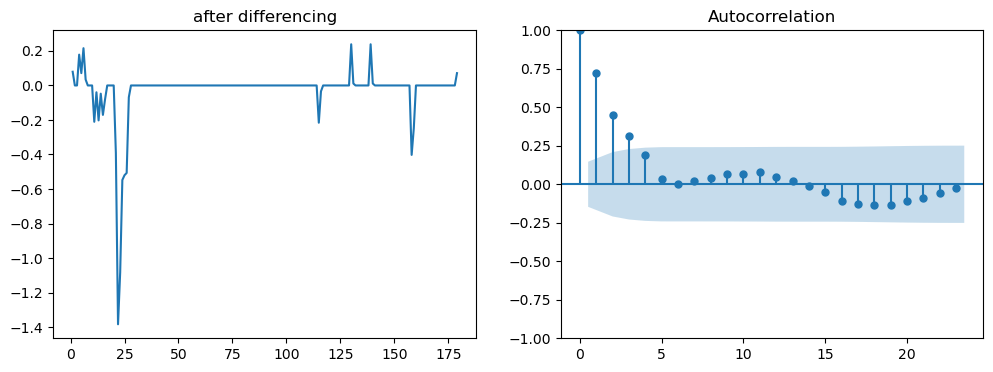

In [212]:
diff=fd2_2.int_rate.diff().dropna()

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
ax1.plot(diff)
ax1.set_title("after differencing")
plot_acf(diff, ax=ax2);

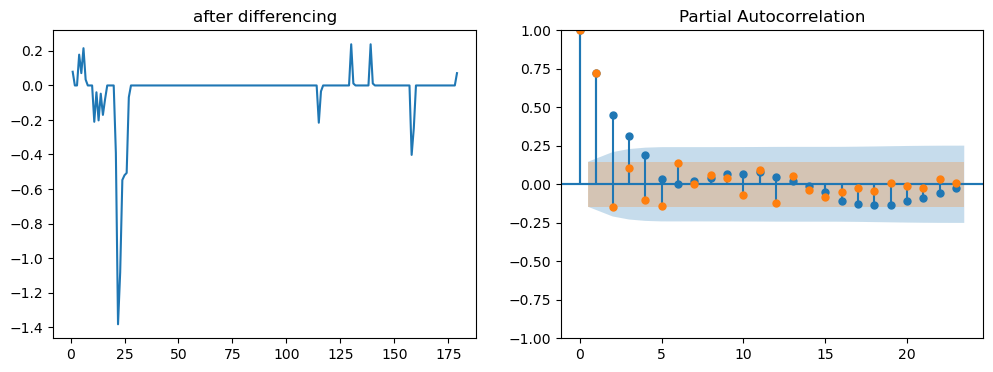

In [213]:
plot_pacf(diff, ax=ax2)

In [214]:
diff

1      0.0795
2      0.0000
3      0.0000
4      0.1786
5      0.0714
6      0.2159
7      0.0341
8      0.0000
9      0.0000
10     0.0000
11    -0.2105
12    -0.0395
13    -0.2024
14    -0.0476
15    -0.1705
16    -0.0795
17     0.0000
18     0.0000
19     0.0000
20     0.0000
21    -0.3913
22    -1.3837
23    -1.0821
24    -0.5477
25    -0.5202
26    -0.5068
27    -0.0682
28     0.0000
29     0.0000
30     0.0000
31     0.0000
32     0.0000
33     0.0000
34     0.0000
35     0.0000
36     0.0000
37     0.0000
38     0.0000
39     0.0000
40     0.0000
41     0.0000
42     0.0000
43     0.0000
44     0.0000
45     0.0000
46     0.0000
47     0.0000
48     0.0000
49     0.0000
50     0.0000
51     0.0000
52     0.0000
53     0.0000
54     0.0000
55     0.0000
56     0.0000
57     0.0000
58     0.0000
59     0.0000
60     0.0000
61     0.0000
62     0.0000
63     0.0000
64     0.0000
65     0.0000
66     0.0000
67     0.0000
68     0.0000
69     0.0000
70     0.0000
71     0.0000
72    

In [215]:
#using the auto_arima function from the pmdarima library to automatically select the best ARIMA model
model = pm.auto_arima(y,start_p=1, max_p=3, d=None, max_d=1,start_q=1, max_q=3,  
                      start_P=1,max_P=3, D=None, max_D=1, start_Q=1, max_Q=3,
                      max_order=10, m=4, seasonal=True, information_criterion='aic',
                      test='adf',trace=True,random_state=10)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[4] intercept   : AIC=-277.874, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=-145.869, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=-273.969, Time=0.16 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=-251.789, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=-142.444, Time=0.02 sec
 ARIMA(1,1,1)(0,0,1)[4] intercept   : AIC=-279.603, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=-278.004, Time=0.15 sec
 ARIMA(1,1,1)(0,0,2)[4] intercept   : AIC=-277.694, Time=0.36 sec
 ARIMA(1,1,1)(1,0,0)[4] intercept   : AIC=-279.384, Time=0.14 sec
 ARIMA(1,1,1)(1,0,2)[4] intercept   : AIC=-276.245, Time=0.54 sec
 ARIMA(1,1,0)(0,0,1)[4] intercept   : AIC=-273.996, Time=0.12 sec
 ARIMA(2,1,1)(0,0,1)[4] intercept   : AIC=-277.655, Time=0.30 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=-277.640, Time=0.33 sec
 ARIMA(0,1,0)(0,0,1)[4] intercept   : AIC=-150.311, Time=0.07 sec
 ARIMA(0,1,2)(0,0,1)[4] intercept

In [216]:
model

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(0, 0, 1, 4),
      suppress_warnings=True, with_intercept=False)

In [217]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  180
Model:             SARIMAX(1, 1, 1)x(0, 0, 1, 4)   Log Likelihood                 144.386
Date:                           Wed, 24 Jan 2024   AIC                           -280.771
Time:                                   16:55:39   BIC                           -268.022
Sample:                                        0   HQIC                          -275.602
                                           - 180                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5716      0.102      5.580      0.000       0.371       0.772
ma.L1          0.3054      0.100      3.058      0.002       0.110       0.501
ma.S.L4        0.1552      0.125      1.242      0.214      -0.090       0.400
sigma2         0.0116      0.001     18.640      0.000       0.010       0.013
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             17331.46
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.25   Skew:                            -5.30
Prob(H) (two-sided):                  0.00   Kurtosis:                        50.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

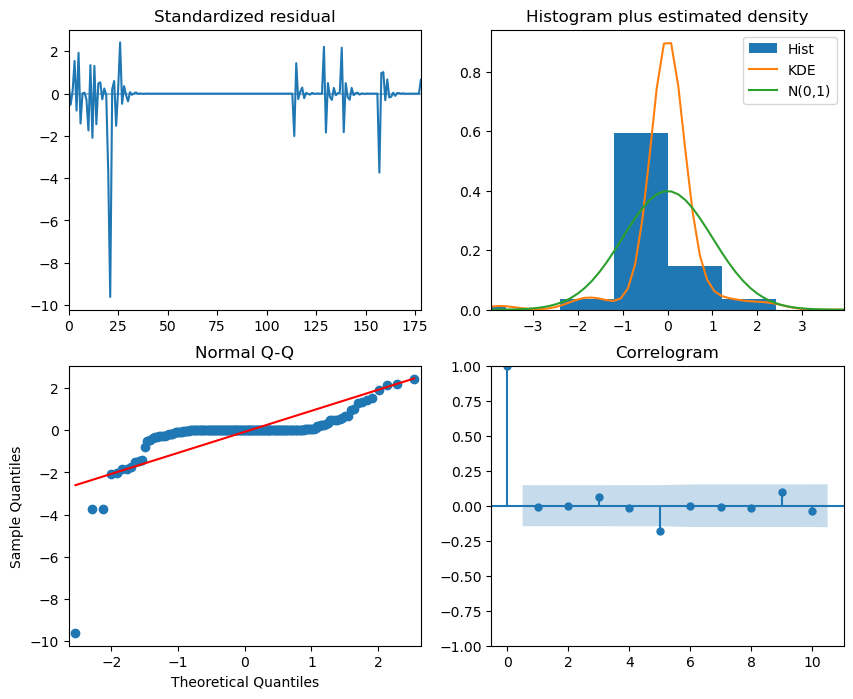

In [218]:
model.plot_diagnostics(figsize=(10,8))
plt.show()

In [219]:
from statsmodels.tsa.arima.model import ARIMA

In [220]:
model=ARIMA(train_data, order = (1,1,1))
result_ARIMA = model.fit()
print(result_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:               int_rate   No. Observations:                  117
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  80.264
Date:                Wed, 24 Jan 2024   AIC                           -154.528
Time:                        16:55:40   BIC                           -146.267
Sample:                             0   HQIC                          -151.175
                                - 117                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6342      0.082      7.721      0.000       0.473       0.795
ma.L1          0.3280      0.106      3.088      0.002       0.120       0.536
sigma2         0.0145      0.001     16.288      0.0

In [221]:
model_fit=model.fit()

In [222]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               int_rate   No. Observations:                  117
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  80.264
Date:                Wed, 24 Jan 2024   AIC                           -154.528
Time:                        16:55:40   BIC                           -146.267
Sample:                             0   HQIC                          -151.175
                                - 117                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6342      0.082      7.721      0.000       0.473       0.795
ma.L1          0.3280      0.106      3.088      0.002       0.120       0.536
sigma2         0.0145      0.001     16.288      0.000       0.013       0.016
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):              8068.65
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               0.05   Skew:                            -5.11
Prob(H) (two-sided):                  0.00   Kurtosis:                        42.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [223]:
pip install nest_asyncio==1.5.3

Note: you may need to restart the kernel to use updated packages.


In [224]:
import pandas as pd

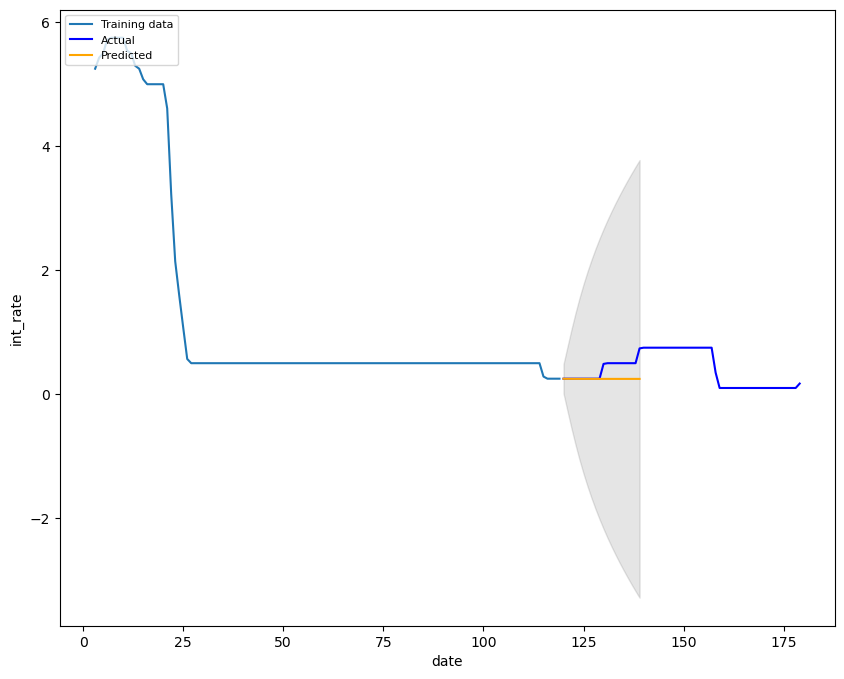

In [225]:
# Forecasting
forecast_result = result_ARIMA.get_forecast(steps=20, alpha=0.05)

# Extracting forecast values and confidence intervals
fc = forecast_result.predicted_mean
conf = forecast_result.conf_int()

# Extracting lower and upper bounds from confidence intervals
lower = conf.iloc[:, 0]
upper = conf.iloc[:, 1]

# Creating Series for visualization
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(lower, index=test_data.index)
upper_series = pd.Series(upper, index=test_data.index)

# Plotting
plt.figure(figsize=(10, 8), dpi=100)
plt.plot(train_data, label='Training data')
plt.plot(test_data, color='blue', label='Actual')
plt.plot(fc_series, color='orange', label='Predicted')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.xlabel('date')
plt.ylabel('int_rate')
plt.legend(loc='upper left', fontsize=8)
plt.show()


                               SARIMAX Results                                
Dep. Variable:               int_rate   No. Observations:                  117
Model:               SARIMAX(0, 1, 0)   Log Likelihood                  29.101
Date:                Wed, 24 Jan 2024   AIC                            -54.201
Time:                        16:55:46   BIC                            -48.694
Sample:                             0   HQIC                           -51.966
                                - 117                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0431      0.042     -1.021      0.307      -0.126       0.040
sigma2         0.0355      0.003     12.306      0.000       0.030       0.041
Ljung-Box (L1) (Q):                  66.77   Jarque-

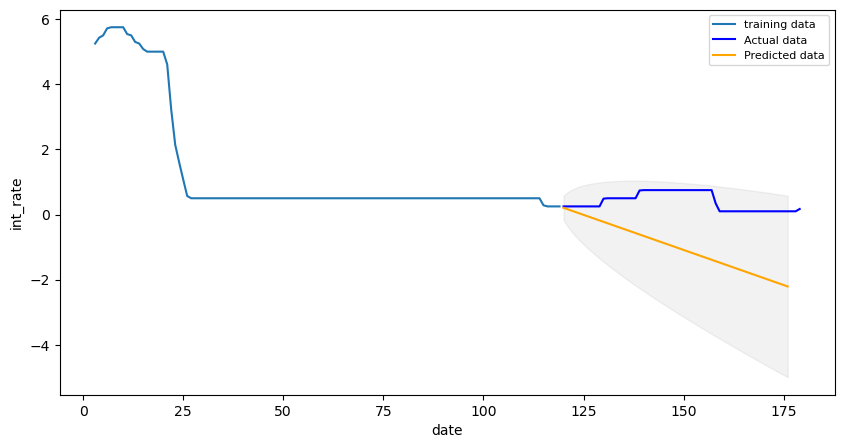

In [226]:
import statsmodels.api as sm

# Assuming 'result_ARIMA' is an already fitted ARIMA model
# If not, replace it with your ARIMA model fitting code

# SARIMAX model
model = sm.tsa.statespace.SARIMAX(endog=train_data, trend='c', order=(0, 1, 0))

# Fitting the model
fitted = model.fit(disp=False)
print(fitted.summary())

# Forecasting
result = fitted.get_forecast(steps=57, alpha=0.05)

# Extracting lower and upper bounds from confidence intervals
fc_series = result.predicted_mean
lower_series = result.conf_int().iloc[:, 0] 
upper_series =result.conf_int().iloc[:, 1] 

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(test_data, color = 'blue', label='Actual data')
plt.plot(fc_series, color = 'orange',label='Predicted data')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='gray', alpha=.10)
plt.xlabel('date')
plt.ylabel('int_rate')
plt.legend(loc='best', fontsize=8)
plt.show()


In [227]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_sa = SARIMAX(y, order=(0,1,1),seasonal_order=(1,0,0,4),enforce_stationarity=False,
enforce_invertibility=False)
results=model_sa.fit()
model_sa_fit = model_sa.fit(disp=0)

In [228]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           int_rate   No. Observations:                  180
Model:             SARIMAX(0, 1, 1)x(1, 0, [], 4)   Log Likelihood                 127.632
Date:                            Wed, 24 Jan 2024   AIC                           -249.263
Time:                                    16:55:47   BIC                           -239.769
Sample:                                         0   HQIC                          -245.412
                                            - 180                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.7299      0.038     19.130      0.000       0.655       0.805
ar.S.L4        0.2704      0.093      2.914      0.004       0.089       0.452
sigma2         0.0136      0.001     25.096      0.000       0.012       0.015
===================================================================================
Ljung-Box (L1) (Q):                   8.54   Jarque-Bera (JB):             14891.92
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.20   Skew:                            -5.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        46.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [276]:
from sklearn import metrics

# Assuming test_data and fc are pandas Series
test_data_values = test_data.values
fc_values = fc.values

# Check lengths
if len(test_data_values) != len(fc_values):
    # If lengths don't match, adjust them
    min_len = min(len(test_data_values), len(fc_values))
    test_data_values = test_data_values[:min_len]
    fc_values = fc_values[:min_len]

print('Mean Absolute Error:', metrics.mean_absolute_error(test_data_values, fc_values))
print('Mean Squared Error:', metrics.mean_squared_error(test_data_values, fc_values))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_data_values, fc_values)))
r2 = metrics.r2_score(test_data_values, fc_values)
print('R-squared (Accuracy):', r2)

Mean Absolute Error: 0.13947482533287597
Mean Squared Error: 0.04072157566790598
Root Mean Squared Error: 0.20179587624108175
R-squared (Accuracy): -0.921831076410009


In [230]:
import statsmodels.api as sm

In [248]:
model=sm.tsa.statespace.SARIMAX(fd2_2['int_rate'],order=(0,1,1),seasonal_order=(0,1,1,4))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                          int_rate   No. Observations:                  180
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 4)   Log Likelihood                 113.829
Date:                           Wed, 24 Jan 2024   AIC                           -221.659
Time:                                   16:59:20   BIC                           -212.165
Sample:                               01-01-2007   HQIC                          -217.808
                                    - 12-01-2021                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.6383      0.041     15.495      0.000       0.558       0.719
ma.S.L4       -0.9304      0.088    -10.563      0.000      -1.103      -0.758
sigma2         0.0152      0.001     13.566      0.000       0.013       0.017
===================================================================================
Ljung-Box (L1) (Q):                  13.71   Jarque-Bera (JB):             14896.59
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.17   Skew:                            -5.16
Prob(H) (two-sided):                  0.00   Kurtosis:                        47.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [250]:
filepath = 'new_dataset.csv'
macro_data = pd.read_csv(filepath, parse_dates=True, index_col='date')
print(macro_data.shape) 
macro_data.head()

(180, 6)


,GDP,weekly_earnings,int_rate,unemp_rate,yield,deposits_rate
date,,,,,,
2007-01-01,84.0,421,5.1705,5.5,5.1419,2.99
2007-02-01,84.2,426,5.2500,5.5,5.1621,3.13
2007-03-01,84.5,417,5.2500,5.5,5.0758,3.10
2007-04-01,84.7,413,5.2500,5.4,5.2787,3.13
2007-05-01,84.8,416,5.4286,5.4,5.4112,3.14


In [251]:
macro_data['deposits_rate'] = macro_data['deposits_rate'].astype(float)

In [252]:
macro_data['int_rate'] = macro_data['int_rate'].astype(float)

In [253]:
macro_data.head()

,GDP,weekly_earnings,int_rate,unemp_rate,yield,deposits_rate
date,,,,,,
2007-01-01,84.0,421,5.1705,5.5,5.1419,2.99
2007-02-01,84.2,426,5.2500,5.5,5.1621,3.13
2007-03-01,84.5,417,5.2500,5.5,5.0758,3.10
2007-04-01,84.7,413,5.2500,5.4,5.2787,3.13
2007-05-01,84.8,416,5.4286,5.4,5.4112,3.14


In [254]:
macro_data.columns

Index(['GDP', 'weekly_earnings', 'int_rate', 'unemp_rate', 'yield',
       'deposits_rate'],
      dtype='object')

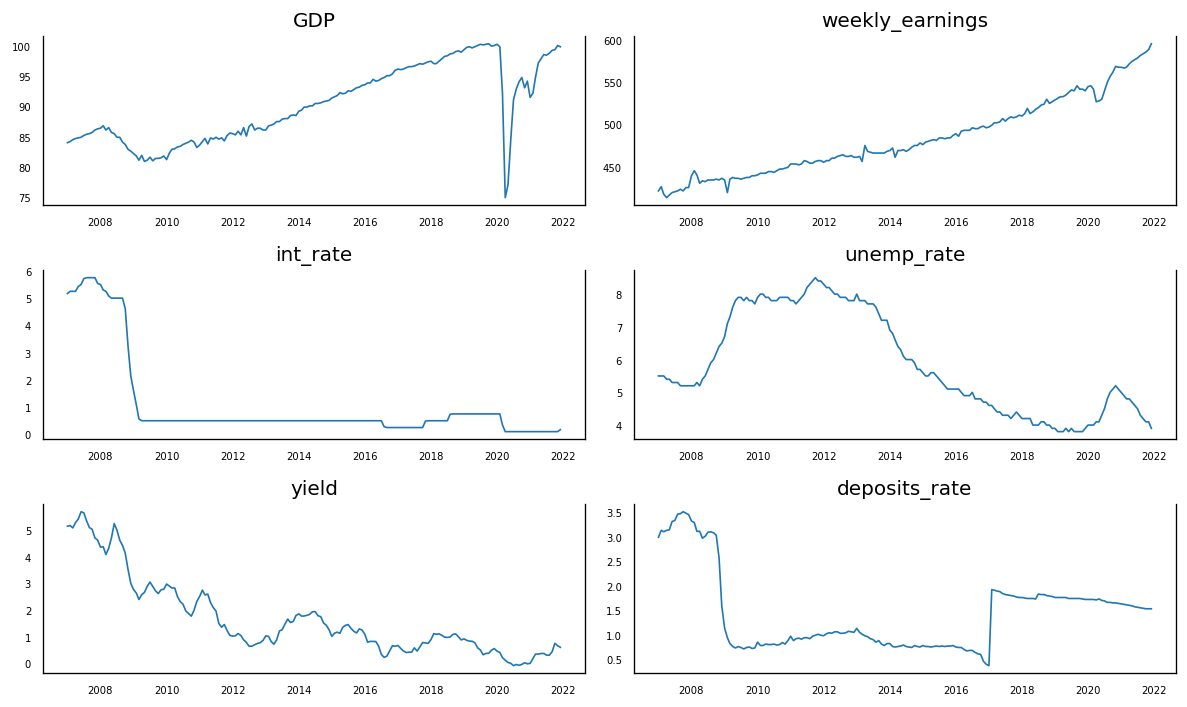

In [255]:
fig, axes = plt.subplots(nrows=3, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = macro_data[macro_data.columns[i]]
    ax.plot(data, linewidth=1)
    # Decorations
    ax.set_title(macro_data.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();


In [256]:
ad_fuller_result_1 = adfuller(macro_data['int_rate'].diff()[1:])

print('int_rate')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(macro_data['deposits_rate'].diff()[1:])

print('deposits_rate')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')


int_rate
ADF Statistic: -4.294520481995286
p-value: 0.00045401861351533363

---------------------

deposits_rate
ADF Statistic: -10.460985762758376
p-value: 1.3592955891125143e-18


In [257]:
print('int_rate causes deposits_rate?\n')
print('------------------')
granger_1 = grangercausalitytests(macro_data[['deposits_rate', 'int_rate']], 7)


print('\n\deposits_rate causes int_rate?\n')
print('------------------')
granger_2 = grangercausalitytests(macro_data[['int_rate', 'deposits_rate']], 7)

int_rate causes deposits_rate?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2035  , p=0.6525  , df_denom=176, df_num=1
ssr based chi2 test:   chi2=0.2069  , p=0.6492  , df=1
likelihood ratio test: chi2=0.2068  , p=0.6493  , df=1
parameter F test:         F=0.2035  , p=0.6525  , df_denom=176, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=28.6191 , p=0.0000  , df_denom=173, df_num=2
ssr based chi2 test:   chi2=58.8924 , p=0.0000  , df=2
likelihood ratio test: chi2=50.8764 , p=0.0000  , df=2
parameter F test:         F=28.6191 , p=0.0000  , df_denom=173, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=19.6608 , p=0.0000  , df_denom=170, df_num=3
ssr based chi2 test:   chi2=61.4111 , p=0.0000  , df=3
likelihood ratio test: chi2=52.7189 , p=0.0000  , df=3
parameter F test:         F=19.6608 , p=0.0000  , df_denom=170, df_num=3

Granger Causality
number of lags (no zero)

In [259]:
macro_data = macro_data[['deposits_rate','int_rate']]
macro_data


,deposits_rate,int_rate
date,,
2007-01-01,2.99,5.1705
2007-02-01,3.13,5.2500
2007-03-01,3.10,5.2500
2007-04-01,3.13,5.2500
2007-05-01,3.14,5.4286
2007-06-01,3.31,5.5000
2007-07-01,3.33,5.7159
2007-08-01,3.46,5.7500
2007-09-01,3.47,5.7500


In [260]:
train_df=macro_data[:-24]
test_df=macro_data[-24:]
print(test_df)

            deposits_rate  int_rate
date                               
2020-01-01           1.72    0.7500
2020-02-01           1.72    0.7500
2020-03-01           1.72    0.3477
2020-04-01           1.71    0.1000
2020-05-01           1.73    0.1000
2020-06-01           1.70    0.1000
2020-07-01           1.69    0.1000
2020-08-01           1.66    0.1000
2020-09-01           1.66    0.1000
2020-10-01           1.65    0.1000
2020-11-01           1.65    0.1000
2020-12-01           1.64    0.1000
2021-01-01           1.63    0.1000
2021-02-01           1.62    0.1000
2021-03-01           1.61    0.1000
2021-04-01           1.60    0.1000
2021-05-01           1.59    0.1000
2021-06-01           1.57    0.1000
2021-07-01           1.56    0.1000
2021-08-01           1.55    0.1000
2021-09-01           1.54    0.1000
2021-10-01           1.53    0.1000
2021-11-01           1.53    0.1000
2021-12-01           1.53    0.1714


In [261]:
print(test_df.shape)

(24, 2)


In [262]:
model = VAR(train_df.diff()[7:])

In [263]:
sorted_order=model.select_order(maxlags=20)
print(sorted_order.summary())


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -10.55     -10.50*   2.624e-05     -10.53*
1       -10.52      -10.39   2.692e-05      -10.47
2       -10.46      -10.24   2.854e-05      -10.37
3       -10.41      -10.10   3.015e-05      -10.28
4       -10.35      -9.951   3.202e-05      -10.19
5       -10.29      -9.803   3.397e-05      -10.09
6       -10.27      -9.694   3.469e-05      -10.04
7       -10.24      -9.572   3.591e-05      -9.966
8       -10.18      -9.422   3.820e-05      -9.869
9       -10.43      -9.584   2.975e-05      -10.08
10      -10.45      -9.522   2.904e-05      -10.07
11      -10.42      -9.404   2.996e-05      -10.01
12      -10.37      -9.262   3.166e-05      -9.920
13      -10.32      -9.119   3.353e-05      -9.829
14      -10.25      -8.969   3.576e-05      -9.732
15      -10.21      -8.835   3.753e-05      -9.651
16      -10.18      -8.714   3.

In [264]:
var_model = VARMAX(train_df, order=(19,0),enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

                                 Statespace Model Results                                
Dep. Variable:     ['deposits_rate', 'int_rate']   No. Observations:                  156
Model:                                   VAR(19)   Log Likelihood                 237.118
                                     + intercept   AIC                           -312.237
Date:                           Wed, 24 Jan 2024   BIC                            -65.198
Time:                                   17:01:40   HQIC                          -211.900
Sample:                               01-01-2007                                         
                                    - 12-01-2019                                         
Covariance Type:                             opg                                         
Ljung-Box (L1) (Q):             0.13, 0.10   Jarque-Bera (JB):    61628.69, 3206.53
Prob(Q):                        0.72, 0.75   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H)

In [265]:
len(train_df.index)

156

In [266]:
n_forecast = 24
predict = fitted_model.get_prediction(start=len(train_df.index),end=len(train_df.index) + n_forecast-1)
predictions=predict.predicted_mean
predictions

,deposits_rate,int_rate
2020-01-01,1.735864,0.829720
2020-02-01,1.762186,0.900905
2020-03-01,1.775771,0.962842
2020-04-01,1.797641,1.038424
2020-05-01,1.810634,1.131807
2020-06-01,1.848225,1.203779
2020-07-01,1.843448,1.275926
2020-08-01,1.863700,1.345967
2020-09-01,1.877919,1.412664
2020-10-01,1.892329,1.485562


In [271]:
predictions.columns=['int_rate_predicted','deposits_rate_predicted']
predictions


,int_rate_predicted,deposits_rate_predicted
2020-01-01,1.735864,0.829720
2020-02-01,1.762186,0.900905
2020-03-01,1.775771,0.962842
2020-04-01,1.797641,1.038424
2020-05-01,1.810634,1.131807
2020-06-01,1.848225,1.203779
2020-07-01,1.843448,1.275926
2020-08-01,1.863700,1.345967
2020-09-01,1.877919,1.412664
2020-10-01,1.892329,1.485562


In [272]:
test_vs_pred=pd.concat([test_df,predictions],axis=1)

<Axes: >

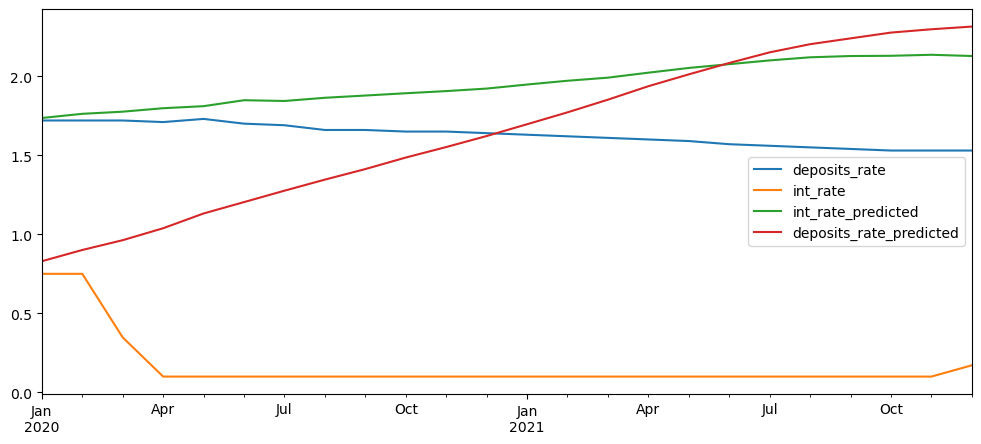

In [273]:
test_vs_pred.plot(figsize=(12,5))


In [275]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test_df, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(test_df, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_df, predictions)))
r2 = metrics.r2_score(test_df, predictions)
print('R-squared (Accuracy):', r2)

Mean Absolute Error: 0.9021315384238848
Mean Squared Error: 1.3485322505019381
Root Mean Squared Error: 1.1612632132733467
R-squared (Accuracy): -53.06545425384763
